In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [2]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= 1e-3
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [4]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()


In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


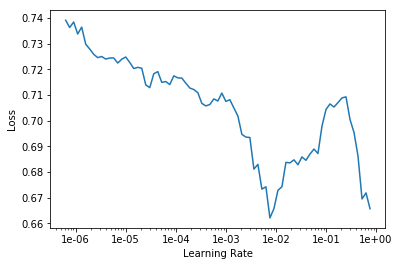

In [6]:
learn.recorder.plot()

In [7]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:08
epoch  train_loss  valid_loss  accuracy
1      0.638892    0.679244    0.664093  (00:23)
2      0.604454    0.519681    0.722008  (00:21)
3      0.509589    0.497903    0.760618  (00:23)
4      0.521012    0.939607    0.586873  (00:18)
5      0.448636    0.703656    0.683398  (00:22)
6      0.463957    0.843918    0.679537  (00:19)
7      0.431116    0.515318    0.741313  (00:21)
8      0.416203    0.469633    0.826255  (00:20)
9      0.411609    0.408344    0.826255  (00:20)
10     0.422295    0.421193    0.814672  (00:19)
11     0.313113    0.359201    0.837838  (00:24)
12     0.303528    0.407637    0.830116  (00:23)
13     0.259898    0.429440    0.799228  (00:23)
14     0.211775    0.394011    0.861004  (00:22)
15     0.246411    0.289288    0.888031  (00:21)
16     0.309242    0.531748    0.787645  (00:18)
17     0.229870    0.358425    0.841699  (00:24)
18     0.207091    0.375500    0.857143  (00:21)
19     0.253223    0.454988    0.822394  (00:19)
20     0.25

In [8]:
learn.validate()

[0.8286853, tensor(0.7722)]

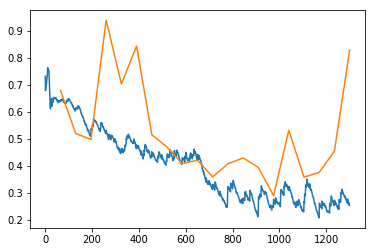

In [9]:
learn.recorder.plot_losses()

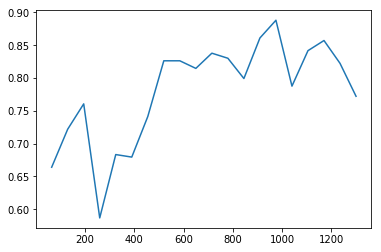

In [10]:
learn.recorder.plot_metrics()

In [12]:
import torch

torch.cuda.empty_cache()